<img alt="Logo ITA" width="500" src="https://logodownload.org/wp-content/uploads/2018/01/ita-logo.png">

*Autor do material:* **Thiago Gonçalves Guimarães Lopes**

*Desenvovlido para a Disciplina:* **CT-600 Estágio Docência**

#### **Aula 6 - Redes Neurais Artificiais**

---

# Fundamento da RNA

---

As Redes Neurais Artificiais (RNA), ou Artificial Neural Network do inglês, é uma ferramenta de ML massivamente utilizada para problemas de regressão e de classificação [1,2,4].

Seu funcionmaneot é baseado no comportamento de associação de impulsos nervosos entre neurônios.

![Matriz de confusão](https://sites.icmc.usp.br/andre/research/neural/image/neuronio.gif)

![Matriz de confusão](https://www.gsigma.ufsc.br/~popov/aulas/rna/neuronio_artificial/neuronio_artificial.jpg)

Do ponto de vista matemático, supondo então um objeto $\mathbf{x}$ com $d$ atributos representado na forma de um vetor $\mathbf{x} = [x_1,x_2,...,x_d]$ e um neurônio com $d$ terminais de entrada cujos pesos são $w_1,w_2,...,w_d$ representados pelo vetor $\mathbf{w}$, pode-se escrever a entrada do neurônio como [4]:
$$
u = \sum_{j=1}^{d} x_jw_j
$$

A saída do neurônio é definido através da aplicação de uma função de ativação ($f_a$) com este valor de entrada. Mostradas nas figuras abaixo, mostrando o comportamentos possíveis para 4 funções de ativações distintas ($\textit{Step},\textit{Sigmoid},\textit{Tanh},\textit{ReLU}$).

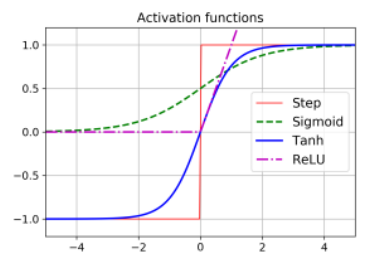

O treinamento desta rede perceptron se baseia no ajuste dos pesos de entrada perante os erros de predição durante o treino. Este problema foi resolvido devido a utilização do algoritmo back-propagation, baseado em gradiente descendente. Este método de aprendizagem é constituído de duas fases de iteração: uma fase para frente (forward) e outra para trás (backward). O algoritmo back-propagation funciona
da seguinte maneira: a camada de entrada aplica os dados para a primeira camada intermediária, onde ocorre a aplicação da função de ativação pelos neurônios, que geram  valores de saída, os quais são transmitidos para as próximas camadas A camada seguinte utiliza o resultado das camadas anteriores para aplicar suas
funções de ativação e o processo continua até os neurônios da camada de saída produzirem  seus valores de saída.

![Matriz de confusão](https://databricks.com/wp-content/uploads/2019/02/neural1.jpg)



**Referência:**
* [1] GÉRON, A. **Mãos à Obra Aprendizado de Máquina com Scikit-Learn e TensorFlow: Conceitos, ferramentas e técnicas para construção de sistemas inteligentes**. [S.l.]: Alta Books, 2019. Traduzido por Rafael Contatori. ISBN 9788550803814.
* [2] SCIKIT-LEARN. **Neural Networks**. 2020. Disponível
em: <https://scikit-learn.org/stable/modules/neural_networks_supervised.html>
* [3] BIGOTO, M. A. R. **Implementação de modelos de machine learning para predição de temperaturas críticas de supercondutores**. 2020. Disponível em: <https://github.com/muriloafonso/TG_ENG_FISICA>.
* [4] FACELI, K. et al. **Inteligência artificial: Uma abordagem de aprendizado de máquina**. 2011.
* [5] LOPES, T. G. G. **Análise comparativa de modelos de Machine Learning na predição de Câncer de pele**. 2020. Disponível em: <https://github.com/thiagolopes97/TCC-ThiagoLopes/blob/main/TCC_ThiagoLopes_Final.pdf>.

# RNA Class - Tipo de vidro

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.datasets import mnist
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

'''
Dataset contendo 7 tipos diferentes de vidro. O conjunto de dados contêm 9 parâmetros sobre a estrutura físico-química do material.
Link: https://www.kaggle.com/uciml/glass

'''


df = pd.read_csv("https://raw.githubusercontent.com/thiagolopes97/ITA/main/CT-600%20Est%C3%A1gio%20Doc%C3%AAncia/dataset/glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


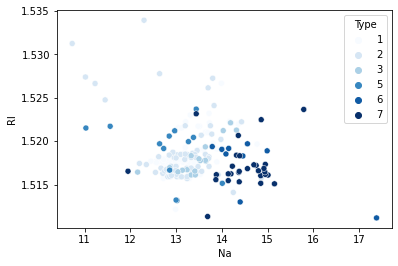

In [2]:
# Vamos visualizar a distribuição do nosso dataset

sns.scatterplot(data=df,x="Na",y="RI",hue="Type",palette='Blues')
plt.show()

In [3]:
# Separando treino e teste
X = df.iloc[:,0:9]
y = df.Type
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Treino do modelo
MLP = MLPClassifier()
MLP.fit(X_train, y_train)

# Teste do modelo
y_pred = MLP.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


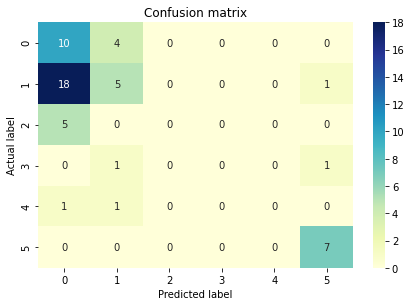

Accuracy: 0.4074074074074074


In [4]:
# Criando a matrix de confusão para análise de eficiência
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

# Plotagem da matriz de confusão

sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Análise de eficiência

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

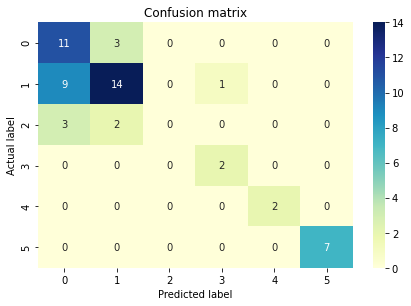

Accuracy: 0.6666666666666666


In [5]:
# Separando treino e teste
X = df.iloc[:,0:9]
y = df.Type
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Treino do modelo
MLP = MLPClassifier((100,100,100),activation="relu",max_iter = 1000000000, tol=1E-10)
MLP.fit(X_train, y_train)

# Teste do modelo
y_pred = MLP.predict(X_test)

# Criando a matrix de confusão para análise de eficiência
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

# Plotagem da matriz de confusão

sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Análise de eficiência

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# RNA Classificação - Reconhecimento de números

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.datasets import mnist
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import time

'''Sobre o dataset: Uma imagem é uma matriz contendo os valores do bit daquela intensidade de cor 
como seu elemento. Uma imagem colorida é composta por 3 matrizes (3 canais de cor diferente). No 
exemplo, vamos analisar uma imabem na escala preto e branco, ou seja, tem apenas um único valor.
Nosso dataset, cotêm diversas dígitos escritos, de 0 a 9, onde nosso conjunto de dados, contêm o
os valores de bit de cada pixel. '''
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

5


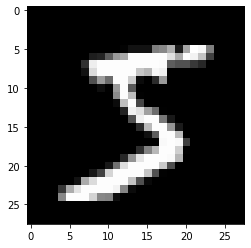

In [9]:
print(y_train[0])
plt.imshow(X_train[0],cmap="gray")

In [10]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [11]:
60000*28*28

47040000

In [12]:
47040000/6000

7840.0

In [13]:
line_X_train = X_train.reshape((60000,784))
line_X_test = X_test.reshape((10000,784))

line_X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


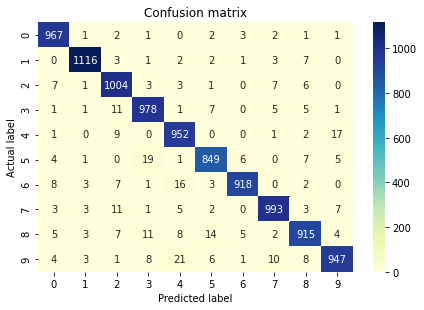

Accuracy: 0.9639
Tempo: 39.09680509567261s


In [31]:
# Treino do modelo
start = time.time()
MLP = MLPClassifier((128), max_iter=20)
MLP.fit(line_X_train, y_train)

# Teste do modelo
y_pred = MLP.predict(line_X_test)

# Criando a matrix de confusão para análise de eficiência
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

# Plotagem da matriz de confusão

sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Análise de eficiência

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
total = time.time() - start
print("Tempo: {}s".format(total))

# Metologia Correta - Keras e TensorFlow

![img](https://thumbs.gfycat.com/DeadlyDeafeningAtlanticblackgoby-max-1mb.gif)

# Preparação dos dados

In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [16]:
from keras.utils.np_utils import to_categorical
print(y_train[0])
y_example = to_categorical(y_train)
print(y_example[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [17]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [18]:
print(X_train[0].max())
print(X_train[0].min())

255
0


In [19]:
X_train = X_train/255
X_test = X_test/255

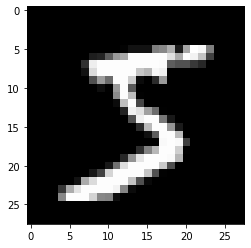

In [20]:
plt.imshow(X_train[0], cmap="gray")

In [21]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000,28,28,1)
X_train.shape

(60000, 28, 28, 1)

# RNA - Normal

Epoch 1/2
1875/1875 [==============================] - 25s 2ms/step - loss: 0.4228 - accuracy: 0.8734
Epoch 2/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1106 - accuracy: 0.9662


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


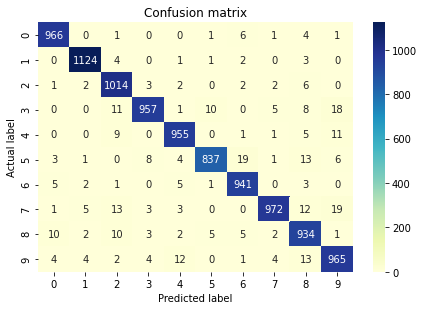

Accuracy: 0.9665
Tempo: 46.36868381500244s


In [22]:
from keras.models import Sequential # Formato global da rede
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten # Tipos de função da rede

model = Sequential()

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

model.add(Dense(100, activation='relu'))

model.add(Dense(50, activation='relu'))


# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# THIS WILL TAKE AWHILE ON MOST COMPUTERS!!!
# CHANGE NUMBER OF EPOCHS IF NECESSARY
# YOUR ACCURACY MAY ALSO BE LOWER THAN WHAT IS SHOWN HERE SINCE THIS WAS TRAINED ON GPU
model.fit(X_train,y_cat_train,epochs=2)

y_pred = model.predict_classes(X_test)

# Criando a matrix de confusão para análise de eficiência
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

# Plotagem da matriz de confusão

sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Análise de eficiência

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Tempo: {}s".format(total))

# RNA - Convulocional

In [27]:
from keras.models import Sequential # Formato global da rede
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten # Tipos de função da rede

start = time.time()
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [28]:
# THIS WILL TAKE AWHILE ON MOST COMPUTERS!!!
# CHANGE NUMBER OF EPOCHS IF NECESSARY
# YOUR ACCURACY MAY ALSO BE LOWER THAN WHAT IS SHOWN HERE SINCE THIS WAS TRAINED ON GPU
model.fit(X_train,y_cat_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2779 - accuracy: 0.9129
Epoch 2/2
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0517 - accuracy: 0.9839


In [29]:
y_pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


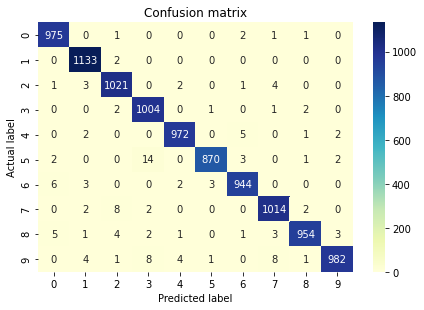

Accuracy: 0.9869
Tempo: 13.97497034072876s


In [30]:
# Criando a matrix de confusão para análise de eficiência
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

# Plotagem da matriz de confusão

sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Análise de eficiência

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
total = time.time() - start
print("Tempo: {}s".format(total))